In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
main_df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=439&path=housing.csv')

In [4]:
main_df.head()
#medinc =median income

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We want to classify houses based on their region and median income. For this, we use the California Housing dataset

<Axes: xlabel='Latitude', ylabel='Longitude'>

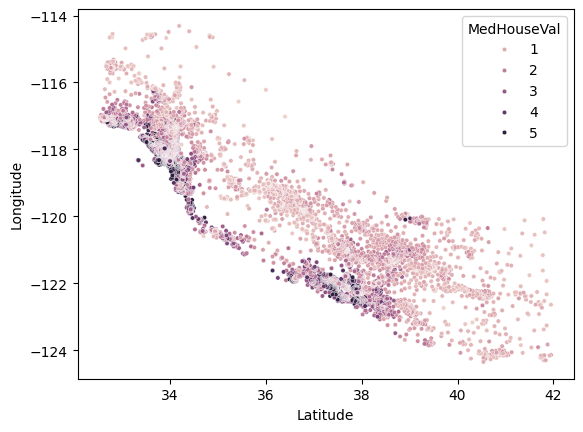

In [5]:
sns.scatterplot(data=main_df,x='Latitude',y='Longitude',hue='MedHouseVal',s=10)

In [6]:
# i am check is there a any na values
main_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
# we split the house income ratings
#Evleri, konum ve gelir bilgisine göre benzer gruplara ayırmak için.
copy_df = main_df[['Latitude','Longitude','MedInc']].copy()



In [8]:
from sklearn.cluster import KMeans

In [9]:
cluster_k = []
for i in range(1,11):
    km = KMeans (n_clusters=i,random_state=46)
    km.fit(copy_df)
    cluster_k.append(km.inertia_) 
# inertia bir ozellik Her noktanın, ait olduğu kümenin merkezine olan uzaklığının kareleri toplamı
# inertia is The total of the squared distances from each point to its cluster center

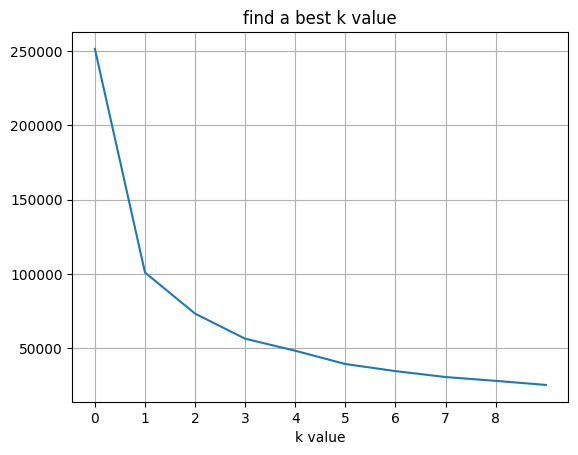

In [10]:
sns.lineplot(data=cluster_k)
plt.xticks(range(0, 9))
plt.title('find a best k value')
plt.xlabel('k value')
plt.grid()


I performed these steps because I am trying to find out which k value I should use in which cluster.

The elbow is around K=3, but we chose K=4 to see the data more clearly



In [11]:
cluster_model = KMeans(n_clusters=4)
cluster_model.fit(copy_df)
copy_df['cluster'] = cluster_model.predict(copy_df)

<Axes: xlabel='Latitude', ylabel='Longitude'>

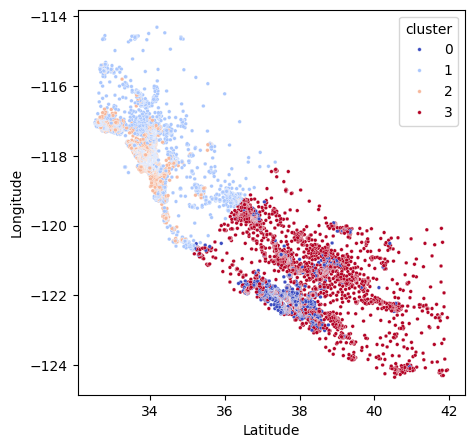

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=copy_df,x='Latitude',y='Longitude',hue='cluster',s=7,palette='coolwarm')
# This is a visualization of the simple clustering I performed.

In [13]:
# Let's include more variables!
copy_df = main_df.copy()
unscaled_cluster = KMeans(n_clusters=(4))
unscaled_cluster.fit(copy_df)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [14]:
copy_df['cluster'] = unscaled_cluster.predict(copy_df)

In [15]:
copy_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0


<Axes: xlabel='Longitude', ylabel='Latitude'>

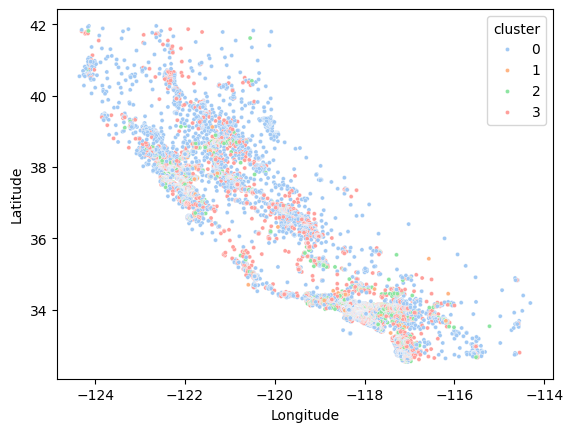

In [16]:
sns.scatterplot(data=copy_df,x='Longitude',y='Latitude',hue='cluster',s=9,palette='pastel')

In [17]:
# rescale
# describe ->  big std = outlier check
#describe -> big max = log

In [18]:
copy_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,1.246076
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.407227
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,0.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,0.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,3.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,3.000000


“We found very large values in AveRooms, AveBedrms, Population, and AveOccup. We fixed them before scaling so they do not affect the clustering.

In [19]:
#  AveRooms= mean(5.4), max(141.9) outlier
#  AveBedrms= mean(1.09), max(34) outlier
#  population = mean(1425.4) max(35682) outlier
#  AveOccup =  mean(3.07) max(1243.3) outlier


In [20]:
(copy_df ==0).sum()

MedInc             0
HouseAge           0
AveRooms           0
AveBedrms          0
Population         0
AveOccup           0
Latitude           0
Longitude          0
MedHouseVal        0
cluster        11282
dtype: int64

In [21]:
copy_df[["AveRooms","AveBedrms","Population","AveOccup"]].isna().sum()


AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
dtype: int64

In [22]:
copy_df['AveRooms'] = np.log1p(copy_df['AveRooms'])
copy_df['AveBedrms'] = np.log1p(copy_df['AveBedrms'])
copy_df['Population'] = np.log1p(copy_df['Population'])
copy_df['AveOccup'] = np.log1p(copy_df['AveOccup'])


In [23]:
copy_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,1.828722,0.732035,7.025503,1.351645,35.631861,-119.569704,2.068558,1.246076
std,1.899822,12.585558,0.231938,0.105412,0.736238,0.207530,2.135952,2.003532,1.153956,1.407227
min,0.499900,1.000000,0.613104,0.287682,1.386294,0.526093,32.540000,-124.350000,0.149990,0.000000
25%,2.563400,18.000000,1.693911,0.696182,6.669498,1.232485,33.930000,-121.800000,1.196000,0.000000
50%,3.534800,29.000000,1.829236,0.717245,7.062192,1.339757,34.260000,-118.490000,1.797000,0.000000
75%,4.743250,37.000000,1.953365,0.741712,7.453562,1.454481,37.710000,-118.010000,2.647250,3.000000
max,15.000100,52.000000,4.962209,3.557251,10.482430,7.126355,41.950000,-114.310000,5.000010,3.000000


In [24]:
# log transformation is doing great job no more extreme outliers


In [25]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [26]:
copy_df1 = main_df.copy()
sc = StandardScaler()
scaled_df = sc.fit_transform(copy_df1)
scaled_df = pd.DataFrame(scaled_df,columns=copy_df1.columns)
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


In [27]:
#After scaling the data, we rechecked the number of clusters
cluster_k =[]
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=46)
    km.fit(copy_df1)
    cluster_k.append(km.inertia_)

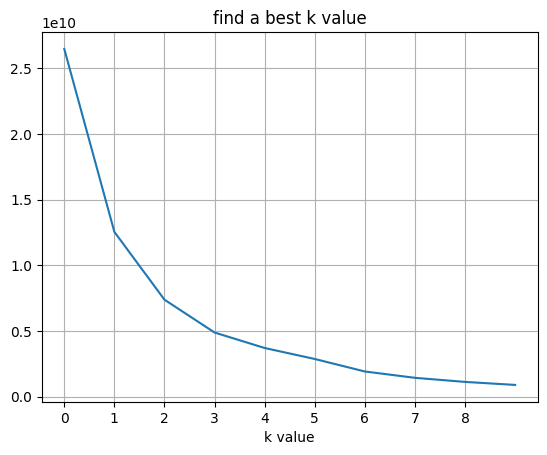

In [28]:
sns.lineplot(data=cluster_k)
plt.xticks(range(0, 9))
plt.title('find a best k value')
plt.xlabel('k value')
plt.grid()


The biggest drop in inertia happens until K=4. After that, improvements are small, so K=4 was chosen.

In [29]:
scaled_cluster_model = KMeans(n_clusters=4)
scaled_cluster_model.fit(scaled_df)
scaled_df['cluster'] =scaled_cluster_model.predict(scaled_df)
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631,1
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156,1
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693,1
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100,2
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900,2


<Axes: xlabel='Longitude', ylabel='Latitude'>

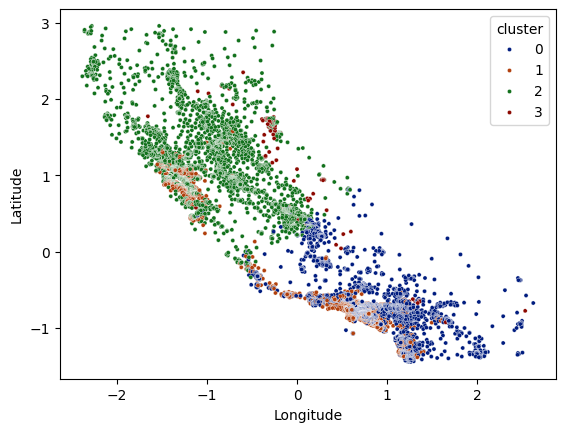

In [30]:
sns.scatterplot(data=scaled_df,x='Longitude',y='Latitude',hue='cluster',s=9,palette='dark')

<Axes: xlabel='AveRooms', ylabel='AveBedrms'>

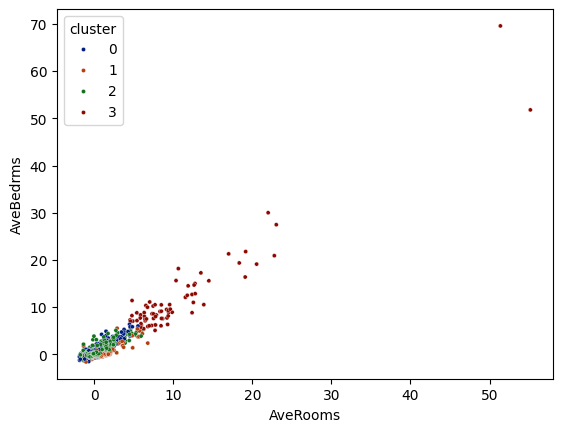

In [31]:
sns.scatterplot(data=scaled_df,x='AveRooms',y='AveBedrms',hue='cluster',s=9,palette='dark')

These two strongly affect each other.

<Axes: xlabel='Population', ylabel='AveOccup'>

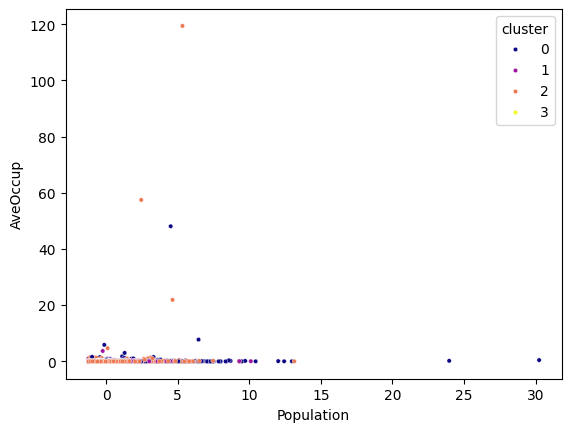

In [32]:

sns.scatterplot(data=scaled_df, x='Population', y='AveOccup', hue = 'cluster', palette='plasma',s=10)

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

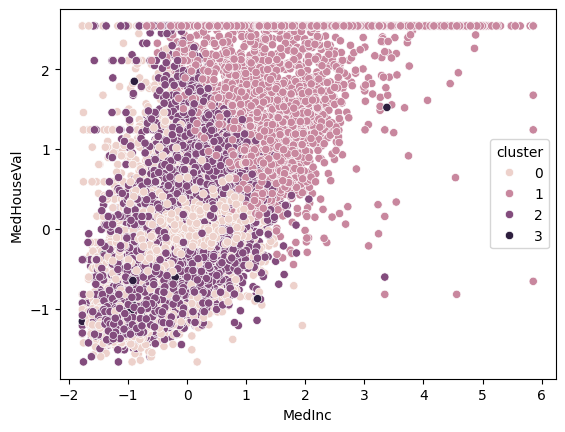

In [33]:
sns.scatterplot(data=scaled_df,x='MedInc',y='MedHouseVal',hue='cluster')

In [34]:
#i build a supervised regression algorithm  for median house value

In [35]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(main_df, random_state=42)